In [1]:
import pandas as pd
df_wine = pd.read_csv('C:/Users/Administrator/Desktop/Python 3/ML_Master/python-machine-learning-book-3rd-edition/ch05/wine.data',header=None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#X,yをそれぞれ定義
X,y = df_wine.iloc[:,1:],df_wine.iloc[:,0]

#分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,stratify=y,random_state=0)

#標準化
SC = StandardScaler()

X_train_std = SC.fit_transform(X_train)
X_test_std = SC.transform(X_test)



In [2]:
import numpy as np
cov_mat = np.cov(X_train_std.T)#np.cov()で共分散行列を作る

#固有値と固有ベクトルを取得
eigenval,eigenvec = np.linalg.eig(cov_mat)#np.linalg.eig

print(eigenval)#固有値は１３個できる（元が１３次元なので）
print(eigenvec.shape)#固有べくとるは、13次元のものが１３個できる

[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]
(13, 13)


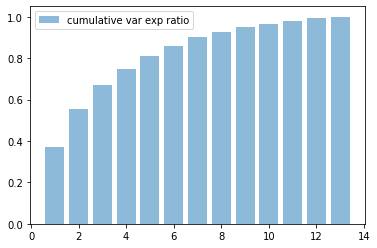

In [3]:
#共分散行列の固有値の合計を計算
tot = sum(eigenval)#共分散行列の固有値の合計は、もとの行列の特徴量の分散の和に等しくなる

#分散説明率を計算
#固有値が大きい順に、固有ベクトルを取り出して、主成分としている
#ある固有値/全固有値和、で、PCA-nの分散寄与率が判明する
var_exp = [(i/tot) for i in sorted(eigenval,reverse=True)]#降順

#分散の累積和を取得
cumsum_varexp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1,14),cumsum_varexp,alpha=0.5,align='center',label='cumulative var exp ratio')
plt.legend()

In [4]:
#(固有値、固有ベクトル)の対タプルからなるリストを作成
#そのペアを、固有値が大きいものから並び替える
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigenval[i]), eigenvec[:, i])
               for i in range(len(eigenval))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k:k[0], reverse=True)

In [5]:
#固有値が大きい順に、２つの固有ベクトルを取り出してみた
w = np.hstack((eigen_pairs[0][1].reshape(-1,1),eigen_pairs[1][1].reshape(-1,1)))
print('Matrix W:\n', w)
#これがそっくりそのまま、２次元に元の特徴量点を射影する射影行列Wになる

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [6]:
X_train_pca = np.dot(X_train_std,w)#射影行列を元の特徴量行列にかける
X_train_pca#２次元に縮約された特徴量ができる

array([[ 2.38299011,  0.45458499],
       [-1.96578183,  1.65376939],
       [-2.53907598,  1.02909066],
       [-1.43010776,  0.6024011 ],
       [ 3.14147227,  0.66214979],
       [ 0.50253552, -2.08907131],
       [ 0.04867722, -2.27536044],
       [ 2.47888989, -0.08603318],
       [ 2.01900259, -1.3538719 ],
       [ 0.75156583, -2.55367947],
       [ 0.72268915, -1.18404391],
       [-3.00366211,  0.94626934],
       [ 2.57518878, -1.0697549 ],
       [ 3.73151104,  1.01968876],
       [-1.12276518,  0.13877   ],
       [ 2.85996853,  2.28819559],
       [-0.74717125, -3.21746061],
       [-1.58427878,  0.16048055],
       [ 3.38887101,  2.11550689],
       [ 3.15405473,  0.54233966],
       [-1.28036506, -1.72926871],
       [-1.71438911,  0.71745249],
       [-1.55040291, -1.7580591 ],
       [ 1.10984489, -1.20480693],
       [-0.69108418, -1.71385374],
       [-2.086036  , -1.68453671],
       [ 2.90393456,  1.95258805],
       [-2.07635784,  1.47183304],
       [-1.74756185,

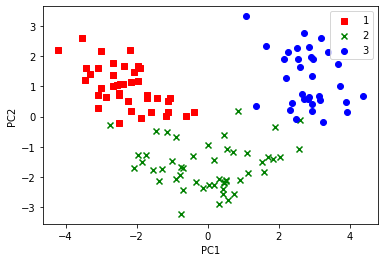

In [7]:
colors = ['r','g','b']
markers = ['s','x','o']

#yの正解ラベル、色、マーカーをzipしてループ
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1],c=c,label=l,marker=m)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(loc='upper right')
#pca(n_components=2)した結果、x軸にひろがりをもつ主成分軸(PCA1が約４０%の分散寄与率を持つことと一致)
#２次元にまで縮約したので、うまく線形分離可能でありそうなこともわかる

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


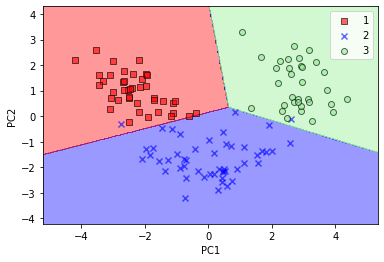

In [9]:
#winedfを、２次元にまで縮めたうえで、ロジ回帰でぶんるいする
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

#PCAインスタンス生成
pca2 = PCA(n_components=2)

#ロジ回帰インスタンス生成
LR = LogisticRegression(random_state=0,penalty='l2',solver='lbfgs')

#次元削減
X_train_pca = pca2.fit_transform(X_train_std)
X_test_pca = pca2.transform(X_test_std)

#削減したXで、ロジ回帰を訓練
LR.fit(X_train_pca,y_train)

#決定境界を描く@traindata
plot_decision_regions(X_train_pca, y_train, LR, resolution=0.02)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


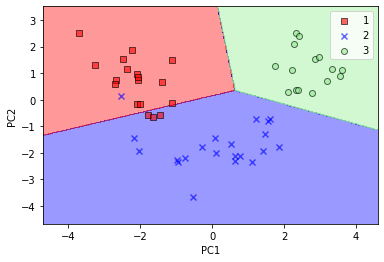

In [10]:
#テストデータの分類性能を見る
plot_decision_regions(X_test_pca, y_test, LR, resolution=0.02)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

In [11]:
#すべての主成分の分散説明率をみたい
pca_all = PCA(n_components=None)#n_components=Noneとすれば、次元削減をしないことになる
X_train_pca = pca_all.fit(X_train_std)
#explained_variance_ratio_でpca(この場合は元の特徴量次元)の分散寄与率を見れる
pca_all.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [12]:
#線形判別分析（LDA）について
#PCAと似ているが、教師あり学習であり、クラスの分離を最大化する特徴量空間を見つける

#データが正規分布にしたがっていて、互いのクラスのデータが統計的独立であることが前提
#(双方のクラスの共分散行列が全く同じ)

#小数点４まで
np.set_printoptions(precision=4)

#クラスごとの平均値vec格納ハコ
mean_vecs = []

#wine_dfの各クラスごとの、特徴量の平均値ベクトル
for label in [1,2,3]:
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0))
    
#個々のクラスについて変動行列を計算する
d = 13 #次元数
Sw = np.zeros((d,d))#クラス間変動行列を初期化

for label,mv in zip([1,2,3],mean_vecs):
    class_scatter = np.zeros((d,d))#Siが入るハコ、０で初期化
    
    for row in X_train_std[y_train==label]:
        
        row,mv = row.reshape(d,1), mv.reshape(d,1)#もとのXを、行ごとに取り出している
        
        #Si = Σ(x-mi)T(x-mi)で、クラス内変動行列が求まる
        class_scatter += (row-mv).dot((row-mv).T)
        
    Sw += class_scatter#クラス間変動行列。Sw = ΣSi でもとまる

print(Sw)#クラス間変動行列
        

[[ 5.0722e+01  3.1007e+00 -7.9323e+00 -5.7848e+00 -2.8879e+00  7.8990e+00
   2.4543e+00  9.3932e-01  9.0781e-01  1.5486e+01  7.0293e+00 -1.8659e+00
   4.9370e+00]
 [ 3.1007e+00  9.0179e+01  4.7074e+00  1.4750e+01 -1.0900e+01 -8.8059e-02
   9.7797e-01  8.4547e+00  4.4732e+00 -1.4494e+01 -2.0361e+01  3.5876e+00
  -1.1176e+01]
 [-7.9323e+00  4.7074e+00  1.1189e+02  7.0126e+01  2.2213e+01  1.5505e+01
   1.4856e+01  2.0454e+01 -2.3344e+00  1.3787e+00  5.6585e+00  8.1917e+00
   3.2570e-01]
 [-5.7848e+00  1.4750e+01  7.0126e+01  9.2147e+01  1.2485e+01  6.2091e+00
   6.2783e+00  1.2735e+01 -4.7597e+00 -4.1511e+00  1.1779e+00  1.1633e+01
  -4.5296e+00]
 [-2.8879e+00 -1.0900e+01  2.2213e+01  1.2485e+01  1.0605e+02  1.0950e+01
   5.2875e+00 -2.1136e+01  1.3076e+01  5.9930e+00  8.4568e+00 -5.3128e-01
   1.1845e+01]
 [ 7.8990e+00 -8.8059e-02  1.5505e+01  6.2091e+00  1.0950e+01  5.7194e+01
   2.8971e+01 -7.4850e+00  3.0810e+01  1.5516e+01  6.6816e-01  1.9382e+01
   6.3808e+00]
 [ 2.4543e+00  9.7797e

In [14]:
#クラス内変動行列は正規化しておく必要がある（個々のクラスの分布個数が等しくないため、クラス内データ個数で割って正規化する）

#個々のクラスについて変動行列を計算する
d = 13 #次元数
Sw = np.zeros((d,d))#クラス内変動行列を初期化

for label,mv in zip([1,2,3],mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)#正規化すると、結局各クラスに属するデータポイントからなる
    #行列の共分散行列を求めることになる
    Sw += class_scatter   

print('Scaled within-class scatter matrix: %sx%s' % (Sw.shape[0],
                                                     Sw.shape[1]))

Scaled within-class scatter matrix: 13x13


In [15]:
#クラス間変動行列を計算
mean_overall = np.mean(X_train_std, axis=0)
d = 13  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [16]:
#クラス内変動行列とクラス間変動行列が計算できたら、固有値とこゆうべをもとめるじゃなく
#クラス内行列(-1)*クラス間行列　この行列の固有値と固有ベクトルを計算

eigen_vals,eigen_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(S_B))

# 固有値と固有ベクトルのペアからなるタプルのリストをつくって
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# (eigenvalue, eigenvector)　タプルを、固有値の大きいじゅんにソートする
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])
    
#固有値をみると、0でない固有値は２こしかない。つまり０で無い固有値は、クラス数－１しか存在しないことになる
#要は、LDAでの線形判別の個数は最大でクラス数－１でしかないということ

Eigenvalues in descending order:

349.61780890599397
172.76152218979388
6.35195870421366e-14
2.775726337508947e-14
2.1637428255695945e-14
1.947599656725886e-14
1.5723718596141004e-14
1.5723718596141004e-14
8.94299863827598e-15
8.94299863827598e-15
4.370644097943603e-15
4.370644097943603e-15
0.0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


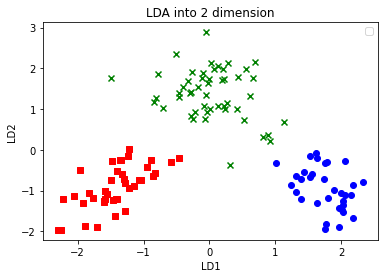

In [31]:
#あとはPCAとおなじ。固有値が大きい順に、固有ベクトルを取り出して、転置行列をつくる
w = np.hstack((eigen_pairs[0][1].reshape(-1,1),eigen_pairs[1][1].reshape(-1,1)))

#転置行列に、元の特徴量行列を掛ける　X'=XW
X_train_lda = X_train_std.dot(w)

colors = ['red','green','blue']
markers = ['s','x','o']

for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_lda[y_train==l,0],X_train_lda[y_train==l,1],c=c,marker=m)

plt.title('LDA into 2 dimension')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='upper right')

新しい特徴量空間では、３つのクラスが完全に線形分離されている

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


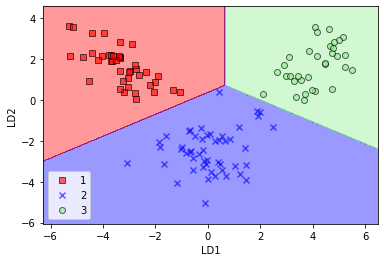

In [38]:
#sklearnによる実装
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#次元数を指定し、LDAの次元数を指定する
lda = LDA(n_components=2)

#train dataにfitさせる.PCAと異なるのは、LDAは教師あり学習であるので、yの情報も必要ということになる
X_train_lda = lda.fit_transform(X_train_std,y_train)

#ロジ回帰を、LDAで２次元にまで圧縮したデータで分類するとどうなるのか見てみる
#ロジ回帰インスタンス生成
LR2 = LogisticRegression(random_state=0,penalty='l2',solver='lbfgs')

#fit
LR2.fit(X_train_lda,y_train)
#決定境界描画
plot_decision_regions(X_train_lda, y_train, LR2, resolution=0.02)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


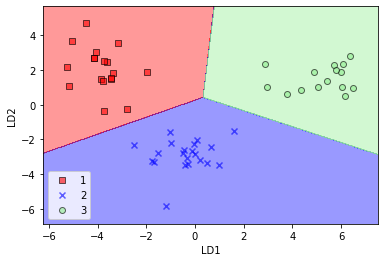

In [39]:
#test データセットではどうか
#次元数を指定し、LDAの次元数を指定する
lda = LDA(n_components=2)

#fit into test data
X_test_lda = lda.fit_transform(X_test_std,y_test)

#ロジ回帰を、LDAで２次元にまで圧縮したデータで分類するとどうなるのか見てみる
#ロジ回帰インスタンス生成
LR3 = LogisticRegression(random_state=0,penalty='l2',solver='lbfgs')

#fit
LR3.fit(X_test_lda,y_test)
#決定境界描画
plot_decision_regions(X_test_lda, y_test, LR3, resolution=0.02)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()

<AxesSubplot:>

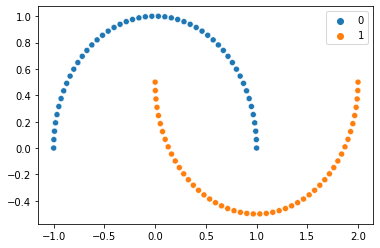

In [56]:
#カーネルPCAについて
#理屈に関してはパス！SVMのカーネルトリックと同じで、より高次元に射影してその次元で線形分離できれば、非線形で分離できんじゃね？
#でその計算の中にX同士の内積があって、高次元に射影する関数φ(xj)φ(xk)の計算がくそおもいけど、これをカーネル関数K（xj,xk）で計算すれば
#めんどい内積の計算パスできる！っていうアイデア


from sklearn.datasets import make_moons

#カーネルPCAモジュールを使うことで、非線形
from sklearn.decomposition import KernelPCA

#月データ（非線形）
X,y = make_moons(n_samples=100,random_state=0)

#見ての通り線形分離不可能
import seaborn as sns
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)


<AxesSubplot:>

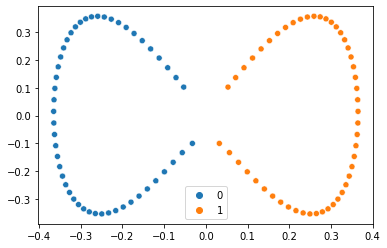

In [57]:
#ここで、カーネルPCAによって非線形データを,線形で分離できるように変換する
#データを非線形変換した後にPCAを実施するのがカーネルPCA
kpca = KernelPCA(n_components=2,kernel='rbf',gamma=15)

#非線形であるデータを、２次元のうえで線形分離可能になるようにrbfカーネルで高次元空間に写像して
#その高次元空間の位置から、２次元にまた戻したってかんじ
Xkpca = kpca.fit_transform(X)
sns.scatterplot(x=Xkpca[:,0],y=Xkpca[:,1],hue=y)
